<div class="alert alert-block alert-info">

- [Import the needed libraries](#2nd-bullet)<br>
- [Import the dataset](#3rd-bullet)<br>
    
- [Filter methods](#6th-bullet)<br>
    - [Univariate variables](#7th-bullet)<br>
    - [Correlation Indices](#8th-bullet)<br>
    - [Chi-Square](#9th-bullet)<br>
- [Wrapper Methods](#10th-bullet)<br>
    - [RFE](#11th-bullet)<br>
- [Embedded Methods](#12th-bullet)<br>
    - [Lasso](#13th-bullet)<br>
- [Final Insights](#14th-bullet)<br>
    
</div>

<a class="anchor" id="2nd-bullet">

### Import the needed libraries
    
</a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split


#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE



# embedded methods
from sklearn.linear_model import LassoCV 
from sklearn.feature_selection import mutual_info_regression   # mutual information is a embedded method for regression problems 

# model assessment
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### Import the dataset
    
</a>

In [27]:
preproc_train = pd.read_csv('../Data/train_data_mok.csv')

preproc_val = pd.read_csv('../Data/train_data_mok.csv') 

preproc_test = pd.read_csv('../Data/test_data_mok.csv')


In [31]:
X_preproc_train = preproc_train.drop(columns="Claim Injury Type")  # Features
y_preproc_train = preproc_train["Claim Injury Type"] 

X_preproc_val = preproc_val.drop(columns="Claim Injury Type")  # Features
y_preproc_val = preproc_val["Claim Injury Type"] 


<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## Feature Selection
    
</a>
    
</div>

<a class="anchor" id="6th-bullet">

## Filter methods
    
</a>

<a class="anchor" id="7th-bullet">

### Univariate variables
    
</a>

Check if any of the numerical variables is univariate (variance is equal to 0), then drop those variables if any of those exist.

In [35]:
X_preproc_train.var()

TypeError: could not convert string to float: '2019-12-30'

<a class="anchor" id="8th-bullet">

### Correlation indices
    
</a>

In [14]:
numeric_features = ["Accident Date", "Age at Injury", "Assembly Date", "Average Weekly Wage",
                     "Birth Year", "C-2 Date", "C-3 Date", "First Hearing Date", "IME-4 Count",
                     "Number of Dependents", "COVID-19 Indicator"]

cor_features = preproc_train[numeric_features]

In [9]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [36]:
cor_spearman = cor_features.corr(method ='spearman')
cor_spearman

ValueError: could not convert string to float: '2019-12-30'

We will assume that the Thresholds for feature relevance is 0.2 and redundance for 0,8


<a class="anchor" id="9th-bullet">

### Chi-Square for categorical data

</a>

<a class="anchor" id="11th-bullet">

## Wrapper Methods
    
</a>

<a class="anchor" id="12th-bullet">

### RFE
    
</a>

Using RFE, the objective is finding the optimal number of features to select

In [17]:
model = LogisticRegression()

In [38]:
X_rfe = rfe.fit_transform(X = X_preproc_train, y = y_preproc_train)

ValueError: could not convert string to float: '2019-12-30'

In [39]:
#number of features
nof_list= np.arange(1, 30)            
high_score=0

#Variable to store the optimum features
nof=0           
train_f1score_list =[]
val_f1score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_preproc_train,y_preproc_train)
    X_val_rfe = rfe.transform(X_preproc_val)


    model.fit(X_train_rfe,y_preproc_train)

    # Predictions for F1 score
    y_preproc_train_pred = model.predict(X_train_rfe)
    y_preproc_val_pred = model.predict(X_val_rfe)
    
    #storing results on training data
    train_f1score = f1_score(y_preproc_train,y_preproc_train_pred, average='macro')
    train_f1score_list.append(train_f1score)
    
    #storing results on training data
    val_f1score = f1_score(y_preproc_val,y_preproc_val_pred, average='macro')
    val_f1score_list.append(val_f1score)
    
    #check best score
    if(val_f1score >= high_score):
        high_score = val_f1score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: could not convert string to float: '2019-12-30'

ValueError: x and y must have same first dimension, but have shapes (29,) and (0,)

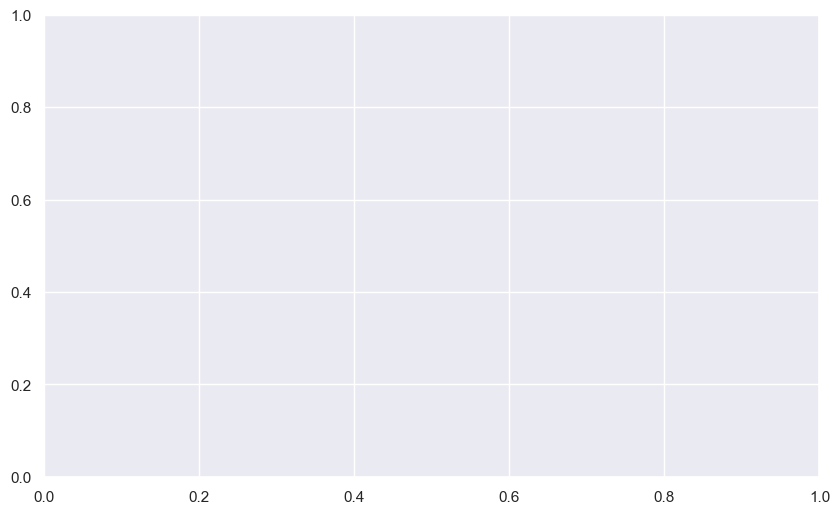

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(nof_list, train_f1score_list, label="Train F1 Score")
plt.plot(nof_list, val_f1score_list, label="Validation F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("F1 Score (Macro)")
plt.title("F1 Score vs Number of Features")
plt.legend()
plt.show()

<a class="anchor" id="13th-bullet">

## Embedded Methods
    
</a>

<a class="anchor" id="14th-bullet">

### Lasso Regression
    
</a>